## Multiple Linear Regression

In [3]:
df = mtcars[, c('mpg', 'disp', 'hp', 'wt')]
head(df)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [2]:
library('ggplot2')

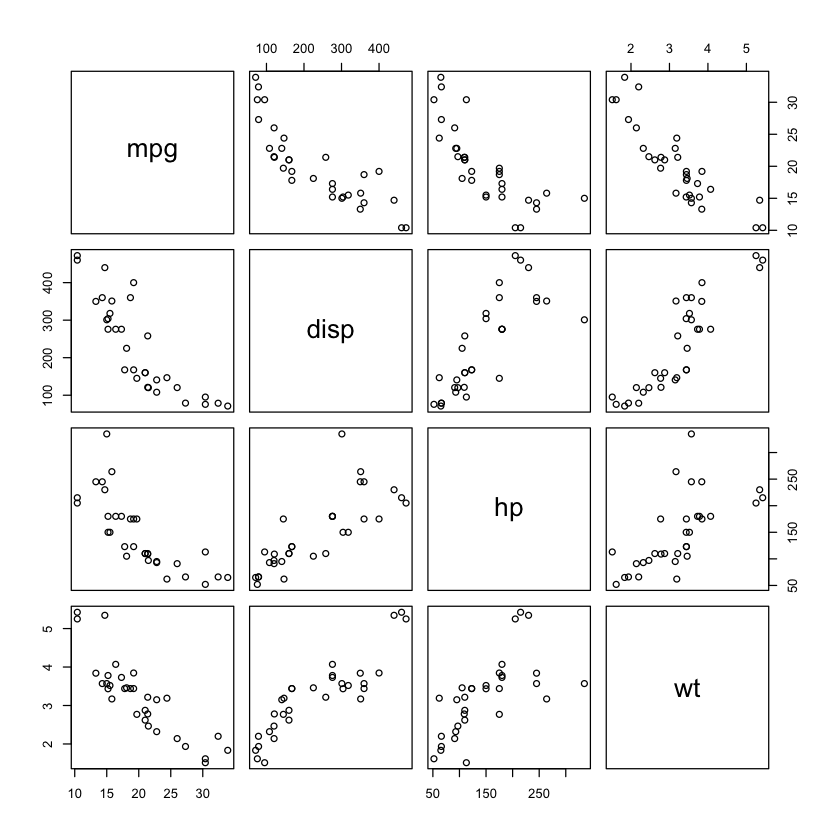

In [4]:
pairs(~mpg + disp + hp + wt, data=df)

In [5]:
cor(df$mpg, df$disp)
cor(df$mpg, df$hp)
cor(df$mpg, df$wt)

[1] -0.8475514

[1] -0.7761684

[1] -0.8676594

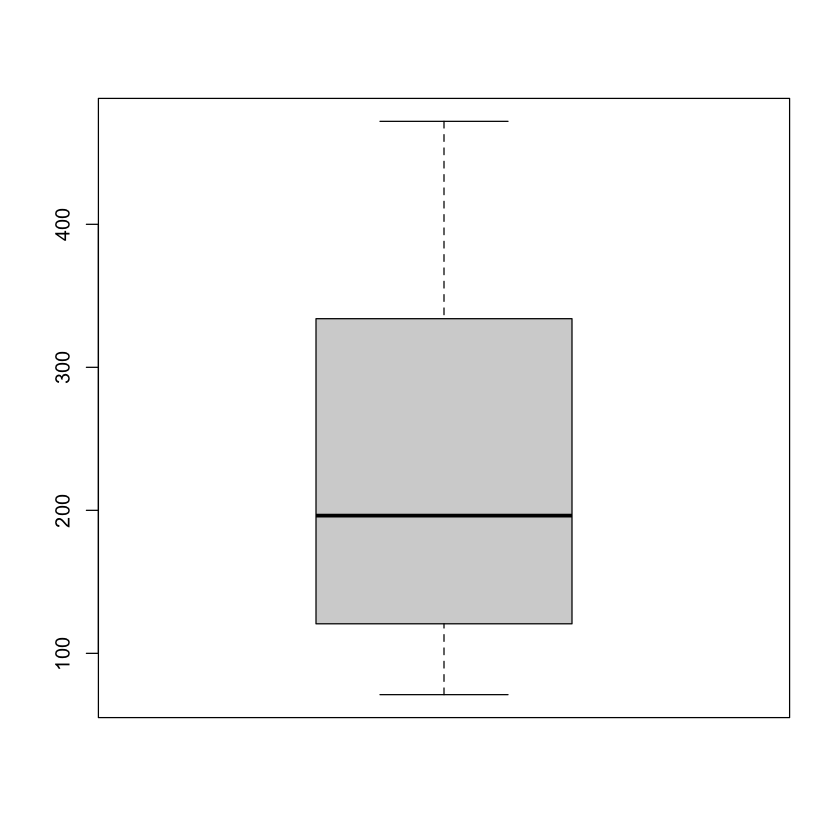

In [6]:
boxplot(df$disp)

In [8]:
hp_outliers = c(boxplot.stats(df$hp)$out)
print('hp_outliers: ')
print(hp_outliers)
print(paste('Numrows: ', sum(df$hp == hp_outliers)))

[1] "hp_outliers: "
[1] 335
[1] "Numrows:  1"


In [9]:
df = df[!(df$hp %in% hp_outliers)]

ERROR: Error in `[.data.frame`(df, !(df$hp %in% hp_outliers)): undefined columns selected


In [10]:
set.seed(42)
trainingRowIndex = sample(1:nrow(df), 0.8*nrow(df))
trainingData = df[trainingRowIndex, ]
testData = df[-trainingRowIndex, ]
head(trainingData)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Chrysler Imperial,14.7,440.0,230,5.345
Hornet Sportabout,18.7,360.0,175,3.440
Mazda RX4,21.0,160.0,110,2.620
Pontiac Firebird,19.2,400.0,175,3.845
Merc 280,19.2,167.6,123,3.440
Hornet 4 Drive,21.4,258.0,110,3.215


In [11]:
lmMod = lm(mpg ~ disp + hp + wt, data=trainingData)
pred = predict(lmMod, testData)

In [12]:
mse = mean(lmMod$residuals^2)
mse

[1] 5.12392

In [14]:
mse_test = mean((testData$mpg - pred)^2)
mse_test

[1] 10.69796

In [15]:
lmMod


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Coefficients:
(Intercept)         disp           hp           wt  
  35.892842     0.001037    -0.027703    -3.741842  


In [16]:
print(summary(lmMod))


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3959 -1.8206  0.0647  0.5109  6.4860 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.892842   2.279547  15.746 4.21e-13 ***
disp         0.001037   0.010748   0.096  0.92405    
hp          -0.027703   0.012347  -2.244  0.03576 *  
wt          -3.741842   1.154840  -3.240  0.00392 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.47 on 21 degrees of freedom
Multiple R-squared:  0.8298,	Adjusted R-squared:  0.8055 
F-statistic: 34.13 on 3 and 21 DF,  p-value: 2.926e-08



In [17]:
coef(lmMod)

(Intercept)         disp           hp           wt 
35.892842178  0.001037051 -0.027702850 -3.741842254

In [19]:
coef(lmMod)[1]
coef(lmMod)[2]
coef(lmMod)[3]
coef(lmMod)[4]

(Intercept) 
   35.89284

disp 
0.001037051

hp 
-0.02770285

wt 
-3.741842

## Model Selection

In [20]:
install.packages('BMA')

also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’





The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpWSRy6G/downloaded_packages


In [21]:
library('BMA')

Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:survival’:

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown Point (version 1.5-5)




In [23]:
cols = colnames(mtcars)
yvar = mtcars[, ('mpg')]
xvars = mtcars[, cols[-1]]
bma = bicreg(xvars, yvar, strict=F, OR=2)

In [24]:
bma


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


 Posterior probabilities(%): 
  cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb 
 37.9   0.0  31.5   0.0 100.0  45.2   0.0  28.8   0.0   0.0 

 Coefficient posterior expected values: 
(Intercept)          cyl         disp           hp         drat           wt  
  27.211564    -0.489171     0.000000    -0.008011     0.000000    -3.816159  
       qsec           vs           am         gear         carb  
   0.505065     0.000000     0.845872     0.000000     0.000000  

In [26]:
summary(bma)


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


  5  models were selected
 Best  5  models (cumulative posterior probability =  1 ): 

           p!=0    EV        SD        model 1    model 2    model 3  
Intercept  100.0  27.211564  13.82229    9.61778   39.68626   37.22727
cyl         37.9  -0.489171   0.71049      .       -1.50779      .    
disp         0.0   0.000000   0.00000      .          .          .    
hp          31.5  -0.008011   0.01373      .          .       -0.03177
drat         0.0   0.000000   0.00000      .          .          .    
wt         100.0  -3.816159   0.93260   -3.91650   -3.19097   -3.87783
qsec        45.2   0.505065   0.59539    1.22589      .          .    
vs           0.0   0.000000   0.00000      .          .          .    
am          28.8   0.845872   1.53016    2.93584      .          .    
gear         0.0   0.000000   0.00000      .          .          .    
carb         0.0   0.000000   0.00000      .          .          .    
    

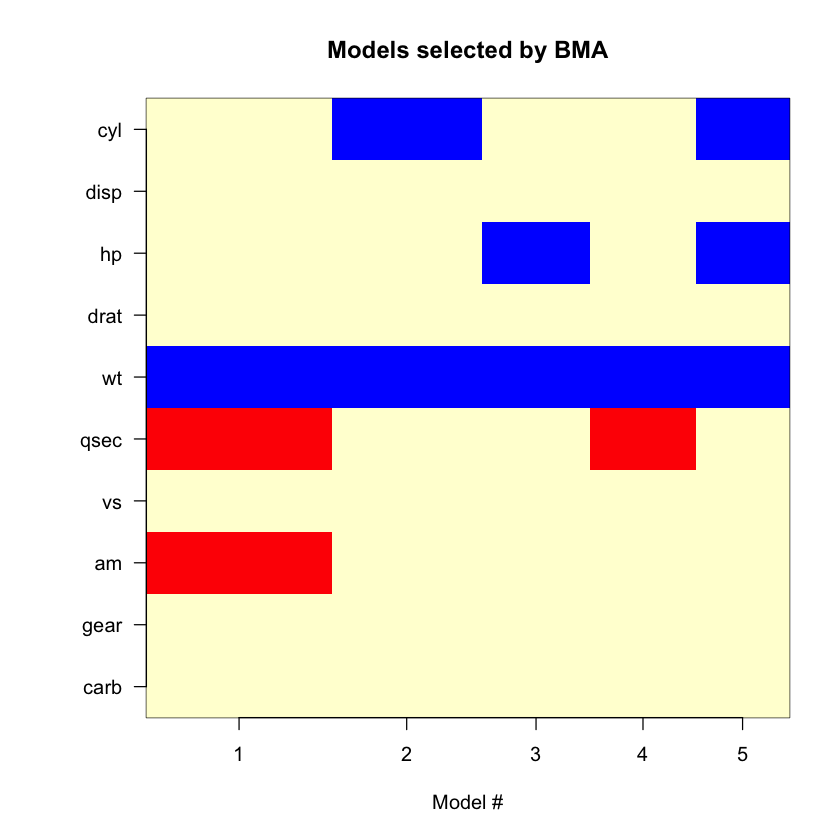

In [27]:
imageplot.bma(bma)

In [28]:
install.packages('relaimpo')

also installing the dependencies ‘survey’, ‘mitools’, ‘corpcor’





The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpWSRy6G/downloaded_packages


In [29]:
library('relaimpo')

Loading required package: MASS

Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:robustbase’:

    salinity


The following object is masked from ‘package:survival’:

    aml


Loading required package: survey

Loading required package: grid

Loading required package: Matrix


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you are a non-US user, a version with the interesting additional metric pmvd is available


from Ulrike Groempings web site at prof.beuth-hochschule.de/groemping.




In [30]:
m = lm(mpg~ wt + qsec + am, data = mtcars)

In [31]:
calc.relimp(m, type='lmg', rela=T, rank=T)

Response variable: mpg 
Total response variance: 36.3241 
Analysis based on 32 observations 

3 Regressors: 
wt qsec am 
Proportion of variance explained by model: 84.97%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

           lmg
wt   0.5640407
qsec 0.1853428
am   0.2506165

Average coefficients for different model sizes: 

            1X       2Xs       3Xs
wt   -5.344472 -5.200397 -3.916504
qsec  1.412125  1.455534  1.225886
am    7.244939  4.426358  2.935837

In [32]:
m = lm(mpg~disp+hp+wt, data = mtcars)
calc.relimp(m, type='lmg', rela=T, rank=T)

Response variable: mpg 
Total response variance: 36.3241 
Analysis based on 32 observations 

3 Regressors: 
disp hp wt 
Proportion of variance explained by model: 82.68%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

           lmg
disp 0.3246691
hp   0.2823081
wt   0.3930228

Average coefficients for different model sizes: 

              1X         2Xs           3Xs
disp -0.04121512 -0.02403551 -0.0009370091
hp   -0.06822828 -0.02830651 -0.0311565508
wt   -5.34447157 -3.61432804 -3.8008905826